In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pickle

Mounted at /content/drive


In [2]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/socar_hackathon/kkh/shooting_angle_to_car/')

In [4]:
from dataset import CAR_Dataset
from trainer import cnn_regression, Trainer

def custom_imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [5]:
## import data

#img
open_file = open("/content/drive/MyDrive/socar_hackathon/kkh/shooting_angle_to_car/jpg_files.pkl", "rb")
jpg_files = pickle.load(open_file)
open_file.close()

# angle
open_file = open("/content/drive/MyDrive/socar_hackathon/kkh/shooting_angle_to_car/angle.pkl", "rb")
angle = pickle.load(open_file)
open_file.close()

# minmax_angle
open_file = open("/content/drive/MyDrive/socar_hackathon/kkh/shooting_angle_to_car/minmax_angle.pkl", "rb")
minmax_angle = pickle.load(open_file)
open_file.close()

In [6]:
get_transforms = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Resize((256,256)),
                                     transforms.Normalize((0.41885927, 0.4217735, 0.4151654), (0.20111592, 0.1974045, 0.19786984))
                                     ])

car_data = CAR_Dataset(jpg_files, minmax_angle, get_transforms)

In [7]:
train_data, test_data, _ = random_split(car_data, [32*250, 32*50, len(car_data)-(32*250+32*50)], generator=torch.Generator().manual_seed(100))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, drop_last=True)

In [8]:
root = "/content/drive/MyDrive/socar_hackathon/kkh/shooting_angle_to_car"
model_dir= os.path.join(root, "model/model_state_dict_07140150.pth")
load_model = cnn_regression()
load_model.load_state_dict(torch.load(model_dir))
load_model.to("cuda")
criterion = nn.MSELoss()
optimizer = optim.Adam(load_model.parameters(), lr=0.001)
device = torch.device('cuda')

In [9]:
trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = load_model,
                  criterion = criterion,
                  optimizer = optimizer,
                  device = device)

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
trainer.test()

OSError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


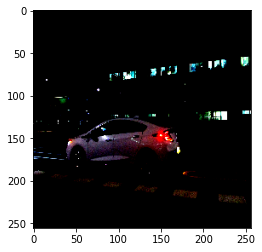

예측 좌우각도: 245.2659454345703
예측 상하각도: -0.09724505245685577
실제 좌우각도: 255.00000089406967
실제 좌우각도: 0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


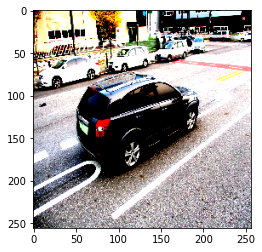

예측 좌우각도: 137.80712890625
예측 상하각도: 30.730121612548828
실제 좌우각도: 134.9999986588955
실제 좌우각도: 30.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


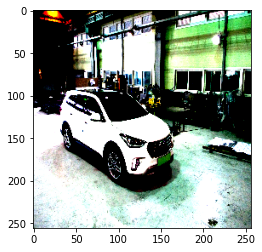

예측 좌우각도: 44.70736312866211
예측 상하각도: 15.096437454223633
실제 좌우각도: 44.999999552965164
실제 좌우각도: 15.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


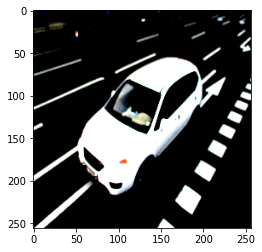

예측 좌우각도: 322.1430358886719
예측 상하각도: 48.87672424316406
실제 좌우각도: 330.0000035762787
실제 좌우각도: 45.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


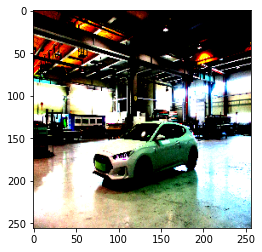

예측 좌우각도: 299.8514099121094
예측 상하각도: 0.06281889975070953
실제 좌우각도: 315.0000071525574
실제 좌우각도: 0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


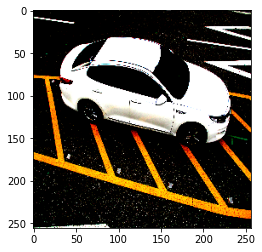

예측 좌우각도: 77.59964752197266
예측 상하각도: 60.306610107421875
실제 좌우각도: 74.9999975413084
실제 좌우각도: 60.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


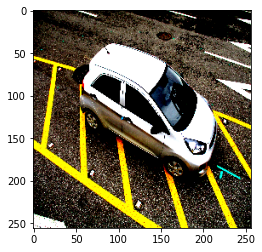

예측 좌우각도: 61.542991638183594
예측 상하각도: 59.87150192260742
실제 좌우각도: 60.00000111758709
실제 좌우각도: 60.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


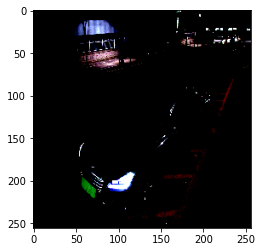

예측 좌우각도: 323.5016174316406
예측 상하각도: 31.623241424560547
실제 좌우각도: 330.0000035762787
실제 좌우각도: 30.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


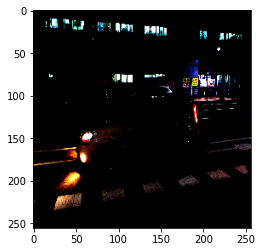

예측 좌우각도: 281.63818359375
예측 상하각도: 14.19623851776123
실제 좌우각도: 284.9999937415123
실제 좌우각도: 15.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


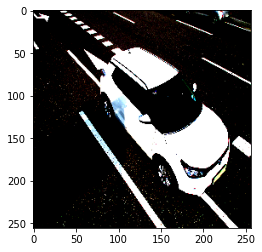

예측 좌우각도: 39.198646545410156
예측 상하각도: 60.0997428894043
실제 좌우각도: 44.999999552965164
실제 좌우각도: 60.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


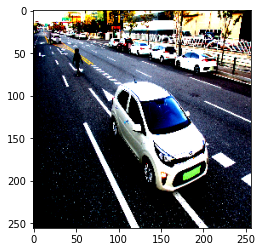

예측 좌우각도: 29.457759857177734
예측 상하각도: 29.139602661132812
실제 좌우각도: 30.000000558793545
실제 좌우각도: 30.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


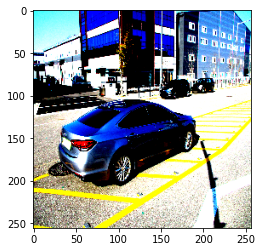

예측 좌우각도: 140.8343048095703
예측 상하각도: 16.458942413330078
실제 좌우각도: 134.9999986588955
실제 좌우각도: 15.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


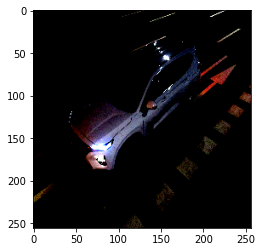

예측 좌우각도: 327.17218017578125
예측 상하각도: 59.86029815673828
실제 좌우각도: 315.0000071525574
실제 좌우각도: 60.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


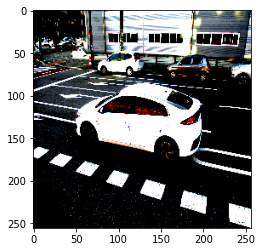

예측 좌우각도: 249.76341247558594
예측 상하각도: 29.71265411376953
실제 좌우각도: 255.00000089406967
실제 좌우각도: 30.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


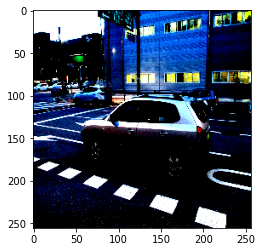

예측 좌우각도: 253.24639892578125
예측 상하각도: 13.889578819274902
실제 좌우각도: 255.00000089406967
실제 좌우각도: 15.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


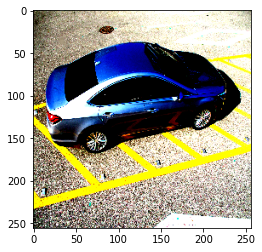

예측 좌우각도: 96.54359436035156
예측 상하각도: 60.36759948730469
실제 좌우각도: 104.99999552965164
실제 좌우각도: 60.0


cnn_regression(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [10]:
test_load = DataLoader(test_data, batch_size=1, shuffle=False, drop_last=True)
k = 0

load_model.eval()
with torch.no_grad():
    for i,true in test_load:
        custom_imshow(i[0])
        pred = load_model(i.to("cuda"))
        h_pred = pred[0] * 345
        v_pred = pred[1] * 60
        print("예측 좌우각도:", h_pred.item())
        print("예측 상하각도:", v_pred.item())
        print("실제 좌우각도:", true[0][0].item()*345)
        print("실제 좌우각도:", true[0][1].item()*60)
        k += 1
        if k > 15:
            break
load_model.train()

In [12]:
h_mae_batch_test = []
v_mae_batch_test = []

load_model.eval()
with torch.no_grad():
    for i,j in test_loader:
        h_true = j[:,0] * 345
        v_true = j[:,1] * 60
        pred = load_model(i.to("cuda"))
        h_pred = pred[:,0] * 345
        v_pred = pred[:,1] * 60

        h_pred = h_pred.to("cpu")
        v_pred = v_pred.to("cpu")

        h_error = h_true - h_pred
        v_error = v_true - v_pred
        
        h_mae = h_error.abs().sum()/len(h_error)
        v_mae = v_error.abs().sum()/len(v_error)

        h_mae_batch_test.append(h_mae)
        v_mae_batch_test.append(v_mae)

load_model.train()

cnn_regression(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [17]:
print(sum(h_mae_batch_test)/len(h_mae_batch_test))
print(sum(v_mae_batch_test)/len(v_mae_batch_test))

tensor(7.0422)
tensor(1.2876)


In [20]:
h_mae_batch_train = []
v_mae_batch_train = []

load_model.eval()
with torch.no_grad():
    for i,j in train_loader:
        h_true = j[:,0] * 345
        v_true = j[:,1] * 60
        pred = load_model(i.to("cuda"))
        h_pred = pred[:,0] * 345
        v_pred = pred[:,1] * 60

        h_pred = h_pred.to("cpu")
        v_pred = v_pred.to("cpu")

        h_error = h_true - h_pred
        v_error = v_true - v_pred
        
        h_mae = h_error.abs().sum()/len(h_error)
        v_mae = v_error.abs().sum()/len(v_error)

        h_mae_batch_train.append(h_mae)
        v_mae_batch_train.append(v_mae)
        
load_model.train()

cnn_regression(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [21]:
print(sum(h_mae_batch_train)/len(h_mae_batch_train))
print(sum(v_mae_batch_train)/len(v_mae_batch_train))

tensor(1.6396)
tensor(0.2318)
